# 4. Classification

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import MultinomialNB

In [32]:

def metriclist(model,test):
    # returns accuracy, f1 score, precision ,recall in a list
    return[accuracy_score(Test['review_stars'], model.predict(test)),
           f1_score(Test['review_stars'], model.predict(test)),
           precision_score(Test['review_stars'], model.predict(test)),
           recall_score(Test['review_stars'], model.predict(test))]

def LRinitNfit(Transtrain,response):
    #creates LR model and fits it to training data
    lr = LogisticRegression(solver='lbfgs', max_iter=7600,C=0.01)
    lr.fit(Transtrain, response)
    return lr

def NBinitNfit(Transtrain,response):
    #creates svm model and fits it to training data
    NB =  MultinomialNB()
    NB.fit(Transtrain, response)
    return NB


def gethlcoef(vectorizer,train,model,title):
    #prints 5 highest and 5 lowest coefficients in LR model
    feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), model.coef_[0]*np.std(pd.DataFrame(train.toarray()))
        )
    }
   
    
    positive=sorted(feature_to_coef.items(), key=lambda x: x[1],reverse=True)[:10]
    negetive=sorted(feature_to_coef.items(), key=lambda x: x[1],)[:10]
    word=[]
    coeff=[]
    for (w,c) in positive:
        word.append(w)
        coeff.append(c)
    for i in range(len(negetive)-1,-1,-1):
       
        word.append(negetive[i][0])
        coeff.append(negetive[i][1])
    plt.barh(word,coeff)
    
    plt.ylabel('word', fontsize=8)
    plt.xlabel('coefficient * std', fontsize=8)
    plt.title(title)

    

In [74]:
def NBfeatures(vectorizer, model,title1,n=10):
    #interpreting features in the NB model and plotting
    R=pd.DataFrame({'word':list(vectorizer.get_feature_names()),
                    'logneg':list(model.feature_log_prob_[0,:]),
                    'logpos':list(model.feature_log_prob_[1,:])})
    feature_to_coef={
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), list(model.feature_log_prob_[0,:]/model.feature_log_prob_[1,:]))        
    }


    
    best_positive = sorted(feature_to_coef.items(), key=lambda x: x[1],reverse=True)[0:n]
    best_neg = sorted(feature_to_coef.items(), key=lambda x: x[1],reverse=False)[0:n]
    word=[]
    coeff=[]
    for (w,c) in best_positive:
        word.append(w)
        coeff.append(c)
    for i in range(len(best_neg)-1,-1,-1):
       
        word.append(best_neg[i][0])
        coeff.append(best_neg[i][1])
    plt.barh(word,coeff)
    
    plt.ylabel('word', fontsize=8)
    plt.xlabel('logProb(T)/logProb(F)', fontsize=8)
    plt.title(title1)
    
 

In [33]:
def dummy(input):
    #dummy function that does nothing, to be passed as preprocessor argument and tokenizer argument in countvectorizer
    # since text is already preprocessed and tokenized
    return input

In [34]:
# load vectorized data
Tfidfvector = pickle.load(open("Tfidfvector.pickle", "rb"))
Tfidfvector2 = pickle.load(open("Tfidfvector2.pickle", "rb"))
Tfidfvector3= pickle.load(open("Tfidfvector3.pickle", "rb"))


In [35]:
TrainTfidf = pickle.load(open("TrainTfidf.pickle", "rb"))
TrainTfidf2 = pickle.load(open("TrainTfidf2.pickle", "rb"))
TrainTfidf3= pickle.load(open("TrainTfidf3.pickle", "rb"))

In [36]:
TestTfidf = pickle.load(open("TestTfidf.pickle", "rb"))
TestTfidf2 = pickle.load(open("TestTfidf2.pickle", "rb"))
TestTfidf3= pickle.load(open("TestTfidf3.pickle", "rb"))

### Logistic regression classification 

In [37]:
lrtf = LRinitNfit(TrainTfidf,Train['review_stars'])
lrtf2 = LRinitNfit(TrainTfidf2,Train['review_stars'])
lrtf3 = LRinitNfit(TrainTfidf3,Train['review_stars'])

In [90]:
pickle.dump(lrtf, open("lrtf.pickle", "wb"))

In [92]:
print('Logistic regression')
d={'unigram':metriclist(lrtf,TestTfidf),
   'uni+bigrams':metriclist(lrtf2,TestTfidf2),
   'bigram':metriclist(lrtf3,TestTfidf3)}
pd.DataFrame(d,index=['Accuracy','f1_score','Precision','Recall'])

Logistic regression


,unigram,uni+bigrams,bigram
Accuracy,0.889837,0.890452,0.576647
f1_score,0.924274,0.924717,0.640819
Precision,0.962714,0.962890,0.894403
Recall,0.888786,0.889456,0.499265


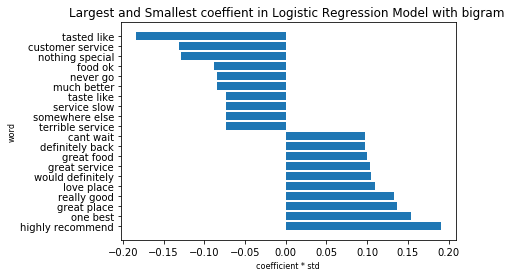

In [21]:
gethlcoef(Tfidfvector3,TrainTfidf3,lrtf3,"Largest and Smallest coeffient in Logistic Regression Model with bigram ")

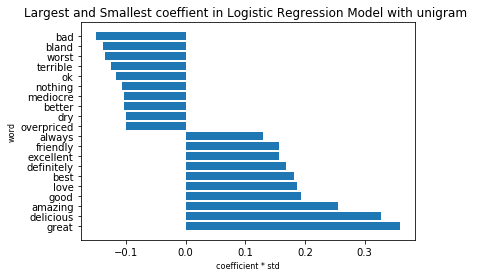

In [11]:
gethlcoef(Tfidfvector,TrainTfidf,lrtf,"Largest and Smallest coeffient in Logistic Regression Model with unigram ")


# Naive Bayes Model Classification

In [40]:
NBtf = NBinitNfit(TrainTfidf,Train['review_stars'])


In [41]:
NBtf2 = NBinitNfit(TrainTfidf2,Train['review_stars'])


In [42]:
NBtf3 = NBinitNfit(TrainTfidf3,Train['review_stars'])

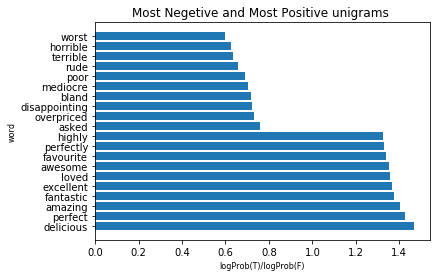

In [78]:
NBfeatures(Tfidfvector,NBtf,'Most Negetive and Most Positive unigrams ','')

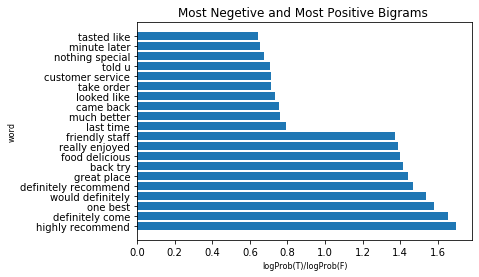

In [79]:
NBfeatures(Tfidfvector3,NBtf3,'Most Negetive and Most Positive Bigrams ','')

In [91]:
print('Naive Bayes')
d={'unigram':metriclist(NBtf,TestTfidf),
   'uni+bigrams':metriclist(NBtf2,TestTfidf2),
   'bigram':metriclist(NBtf3,TestTfidf3)}
pd.DataFrame(d,index=['Accuracy','f1_score','Precision','Recall'])

Naive Bayes


,unigram,uni+bigrams,bigram
Accuracy,0.882931,0.884410,0.567054
f1_score,0.920090,0.921136,0.627728
Precision,0.951147,0.951756,0.897816
Recall,0.890997,0.892424,0.482560
